In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display

import sys
sys.path.append('..')
import helpers, datasets, surfaces, matrices

sns.set_style('ticks')

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


## a) Microstructural profiles covariance

In [2]:
mpc = matrices.MicrostructuralCovarianceMatrix('density', exc_regions='allocortex')

Loading the matrix from /home/asaberi/laminar_organization/code/../output/mpc/parc-schaefer1000_exc-allocortex_metric-parcor/matrix.npz


Intensity profile of parcels:

/home/asaberi/laminar_organization/code/figures/../matrices.py:1540: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(concat_parcellated_input_data.index.tolist(), rotation=90)


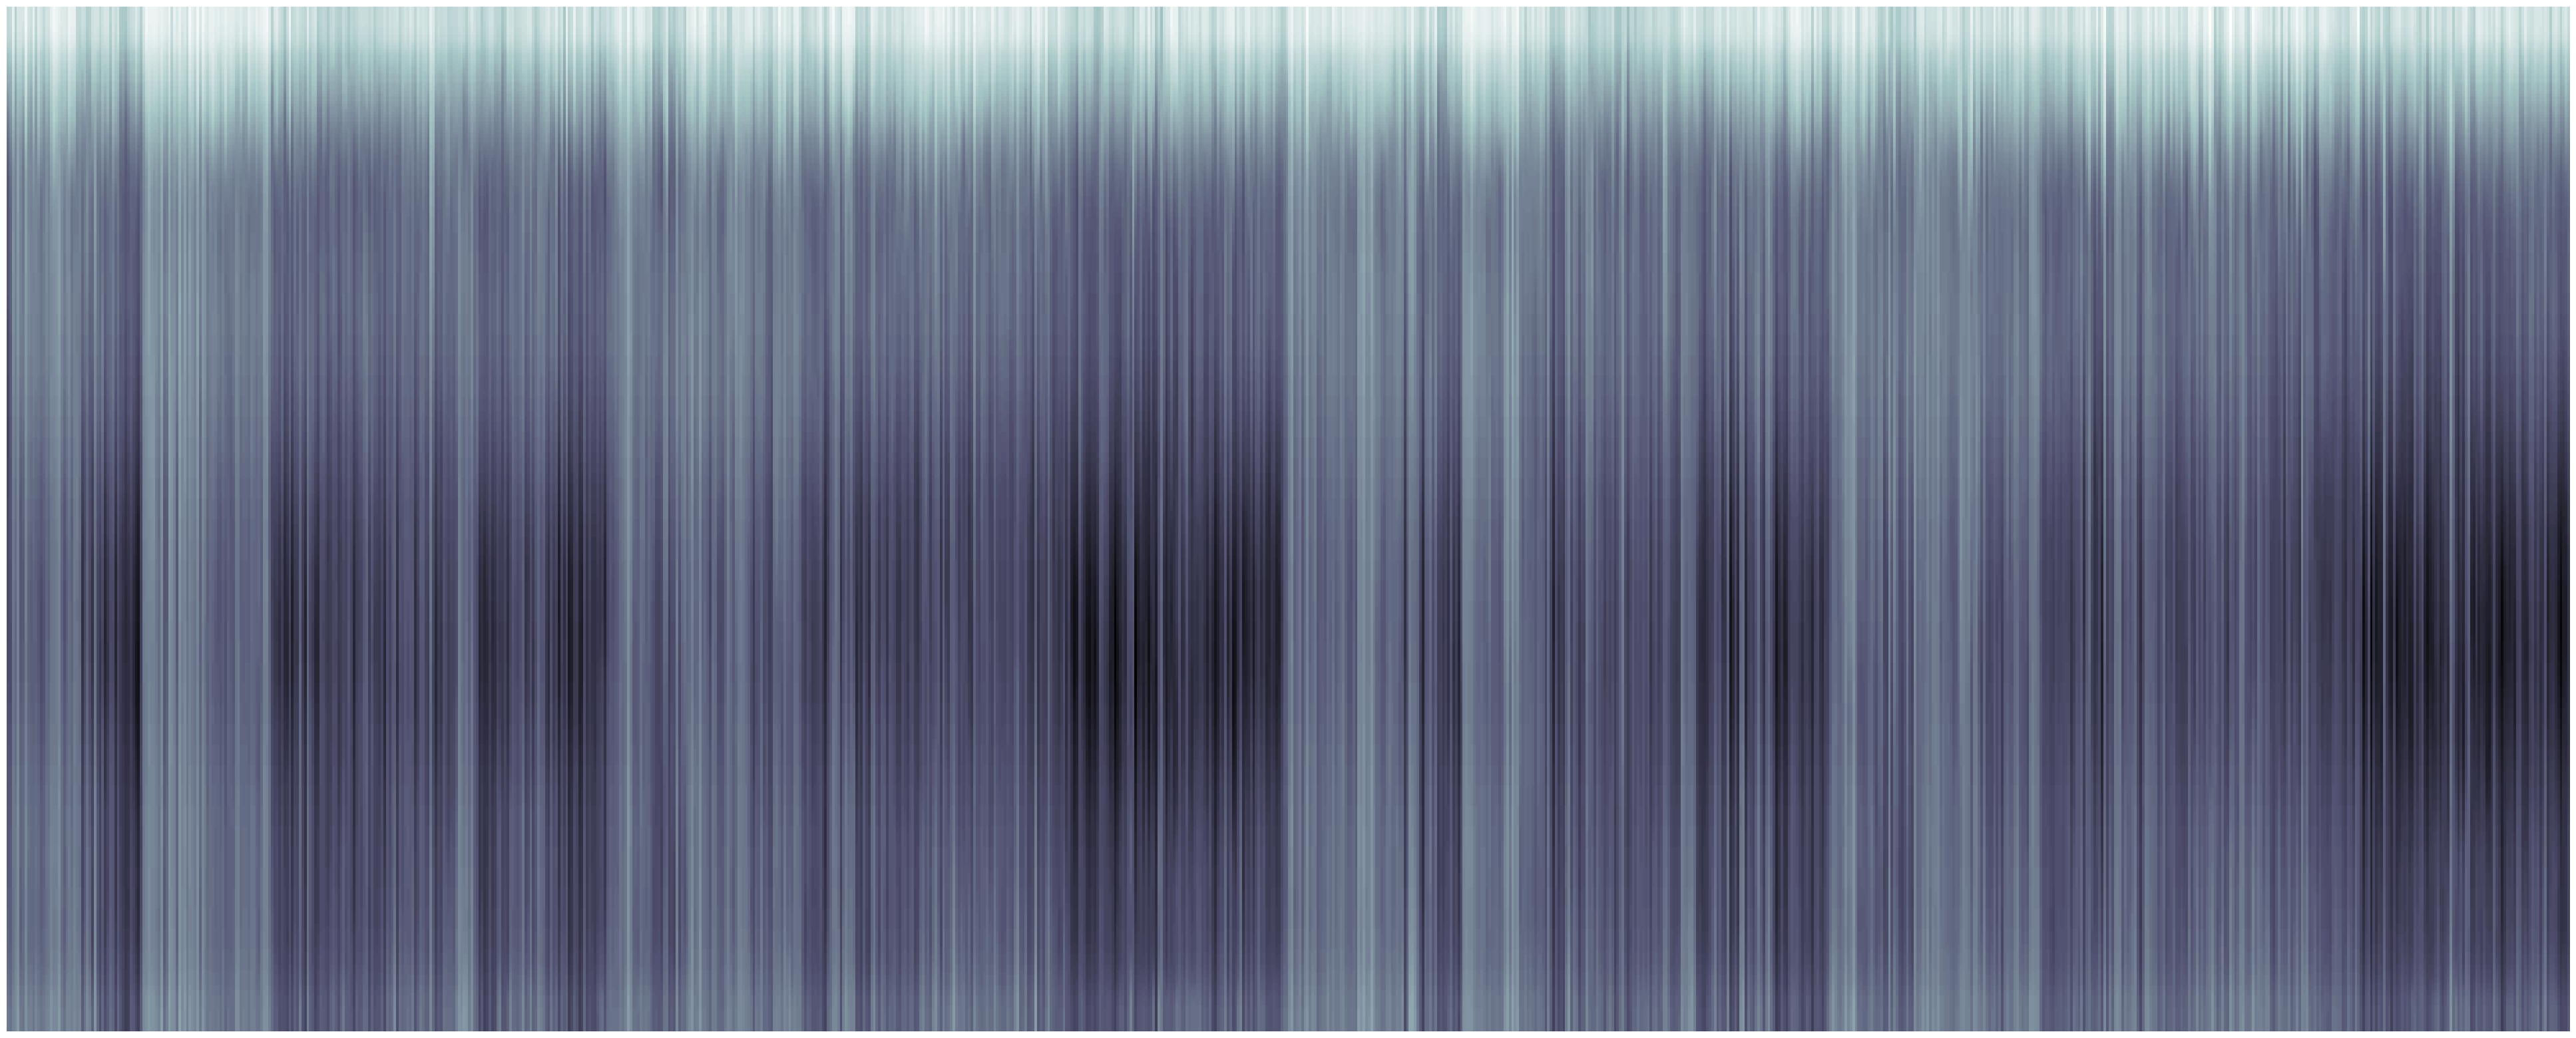

In [3]:
mpc.plot_parcels_profile()

MPC matrix:

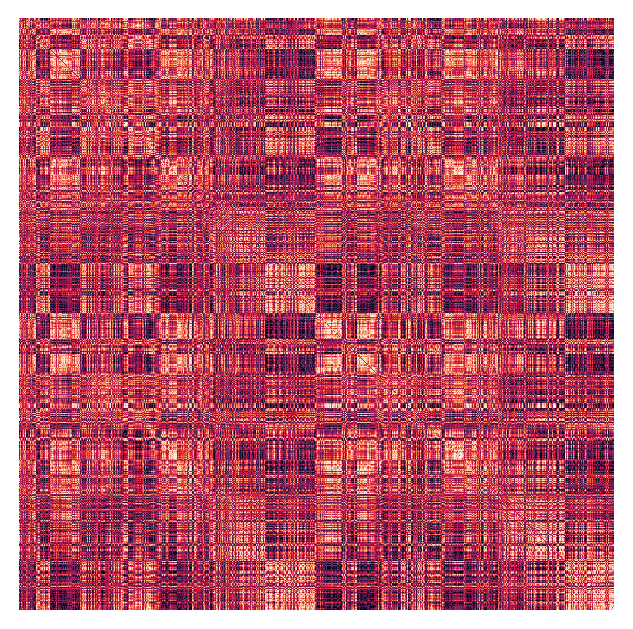

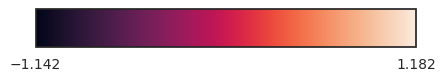

In [4]:
mpc.plot()

## b) MPC G1

In [5]:
mpcg = surfaces.MicrostructuralCovarianceGradients(mpc, n_components_report=1)

Loading the matrix from /home/asaberi/laminar_organization/code/../output/mpc/parc-schaefer1000_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/mpc/parc-schaefer1000_exc-adysgranular_metric-parcor/matrix.npz


/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/brainspace/plotting/surface_plotting.py:437: RuntimeWarning: Running plot_hemispheres without a display may result in a crash. For a workaround please consult https://github.com/MICA-MNI/BrainSpace/issues/66. To suppress this warning set suppress_warnings=True.
  warnings.warn(


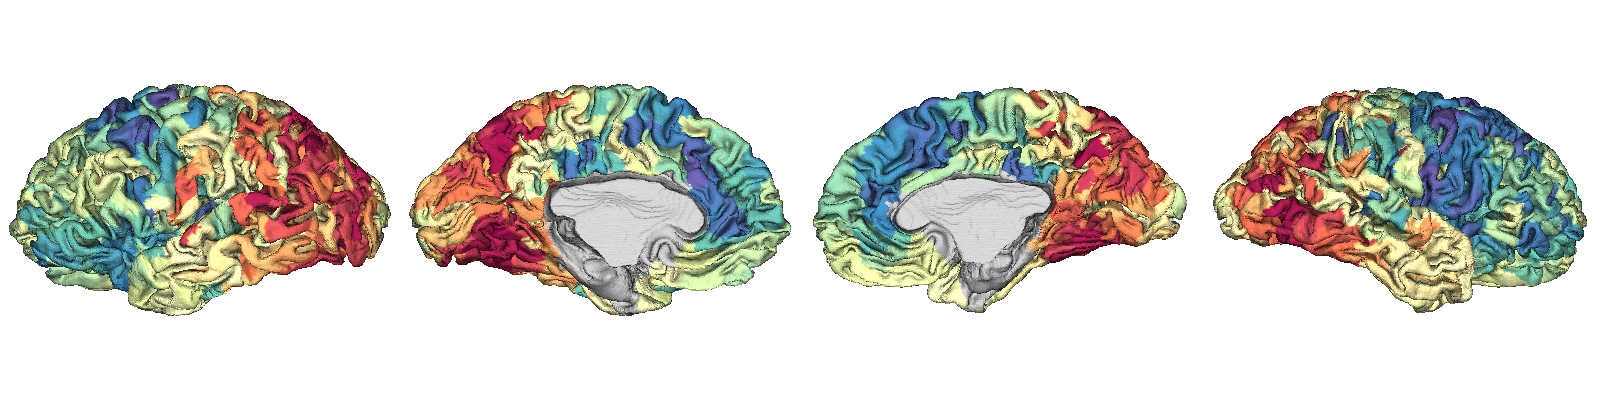

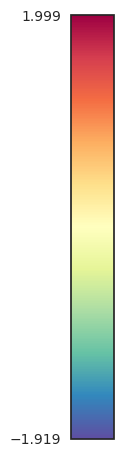

In [6]:
mpcg.plot(columns=['MPC G1'], cbar=True)

## c) Correlation of LTC and MPC

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Pearson correlation with Microstructural profile covariance
Coef: 0.33969129466377357; p-value (spin): 0.0


(0.33969129466377357, 0.0)

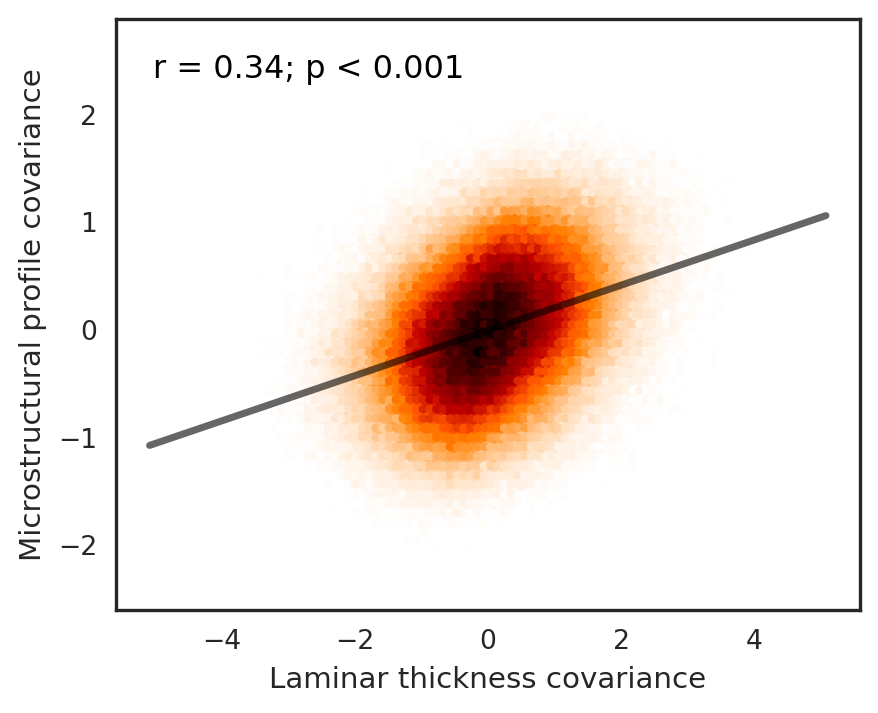

In [7]:
ltc = matrices.MicrostructuralCovarianceMatrix('thickness')
ltc.correlate_edge_wise(mpc, figsize=(5, 4))

## d) Correlation of LTC G1 and MPC G1

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Calculating correlations with variogram test (parcellated)
Surrogates already exist in /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/gradients_approach-pca_kernel-normalized_angle_sparsity-09_n-10/variogram_surrogates_LTC G1_nperm-1000_nparcels-889.npz and have the same parcels


(          LTC G1
 MPC G1  0.552794,
         LTC G1
 MPC G1     0.0)

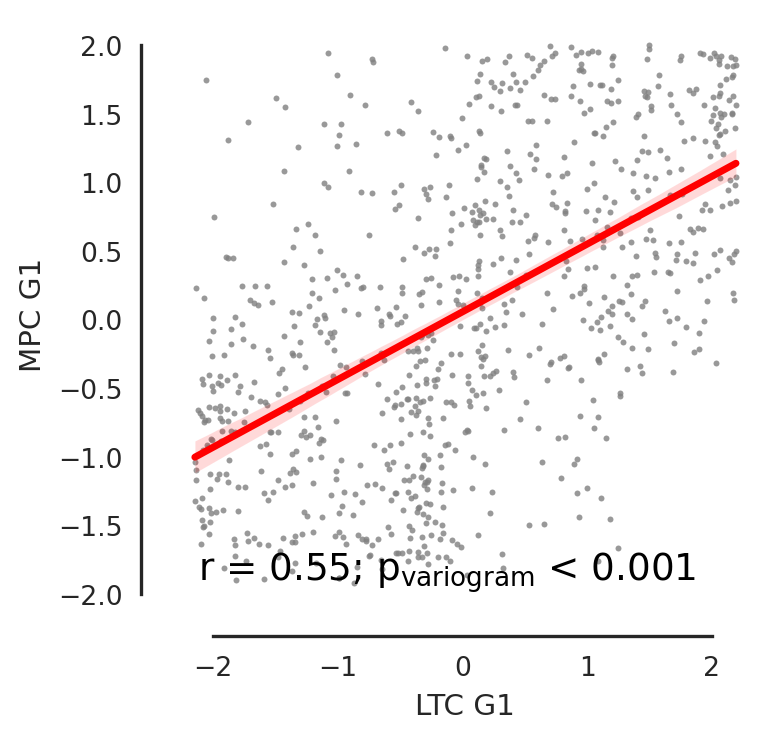

In [8]:
ltcg = surfaces.MicrostructuralCovarianceGradients(ltc)
ltcg.correlate(mpcg, parcellated=True, n_perm=1000, x_columns=['LTC G1'], y_columns=['MPC G1'])